
In this assignment you will be working with a publicly available dataset from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). 

You will be using lending data from 2007-2010 to build a model which predicts whether a borrower paid back their loan in full. You have alreay been provided the csv data file. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for data analysis, data visualization and mahine learning.**

In [5]:
!pip install matplotlib

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset

** Read the data file.**

In [7]:
df = pd.read_csv("datasets/loan_data.csv")

** Print the first five records in the dataset.**

In [9]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


** Check whether the dataset has any missing records. **

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


** Print a statistical summary describing the data.**

In [12]:
df.describe()
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

# Data Visualization


** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**


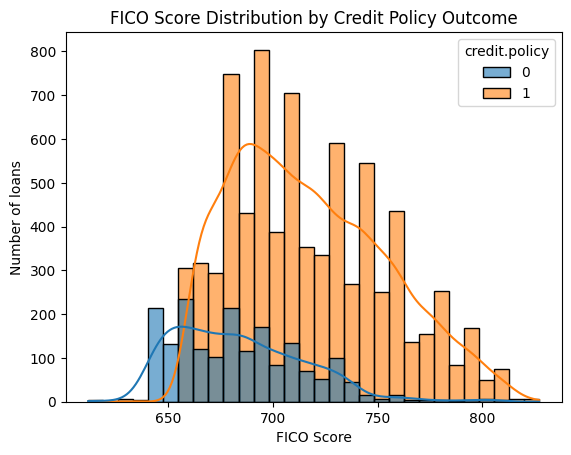

In [19]:
sns.histplot(df,x='fico',hue='credit.policy', bins=30, alpha=0.6, kde ='False')
plt.title('FICO Score Distribution by Credit Policy Outcome')
plt.xlabel('FICO Score')
plt.ylabel('Number of loans')

plt.show()

** From the above diagram can you describe how to the FICO score influenced the bank credit policy? **

Higher FICO scores are correlated with the probability of acceptance 

** Create a similar figure, except this time select by the not.fully.paid column.**

<Axes: xlabel='fico', ylabel='Count'>

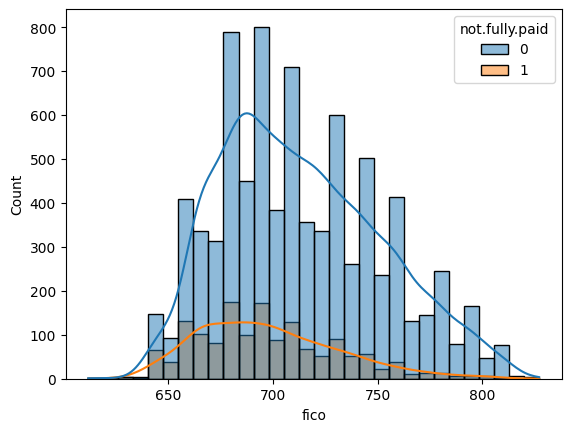

In [21]:
sns.histplot(df,x='fico',hue='not.fully.paid',bins= 30, kde='False')

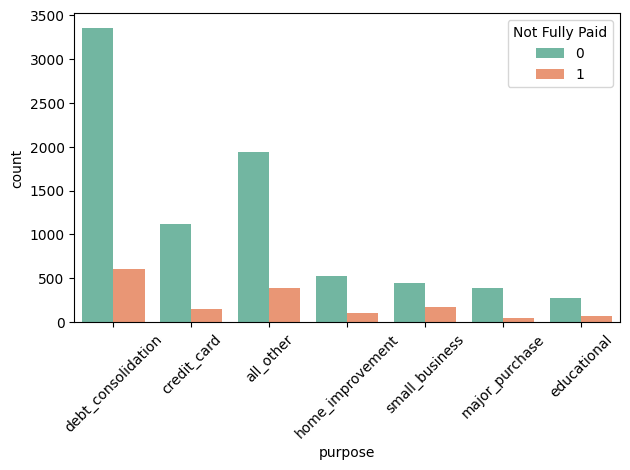

In [24]:
sns.countplot(df,x='purpose',hue='not.fully.paid',palette='Set2')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.legend(title='Not Fully Paid', loc='upper right')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()



** Create a the following plot showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

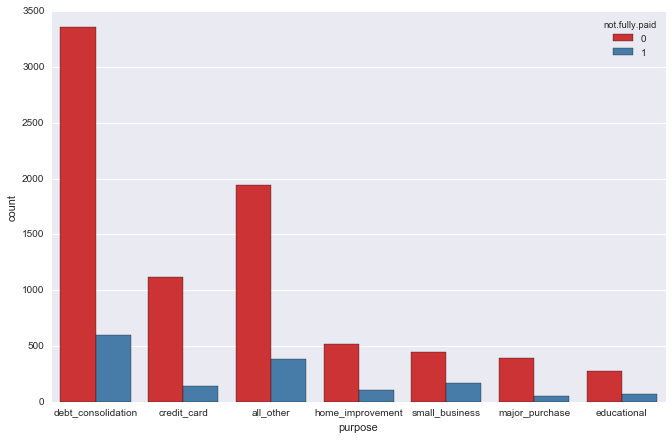

** Create the following plot to depicts the relationship between FICO score and interest rate.**

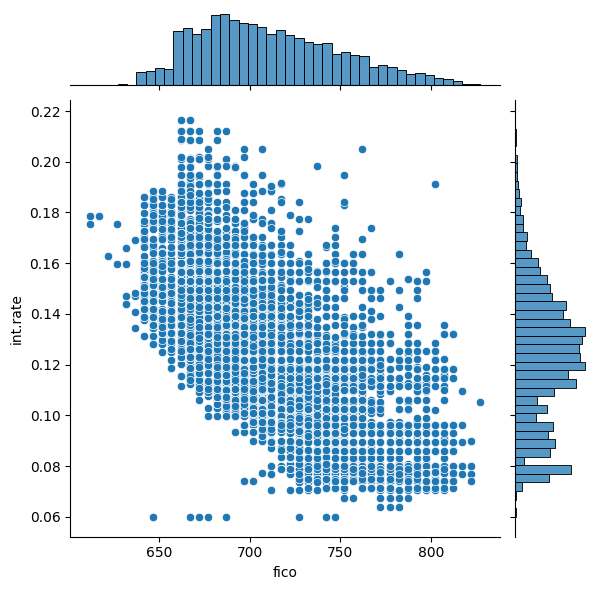

In [25]:
sns.jointplot(df, x='fico',y='int.rate')

# Setting up the Data

## Categorical Features

Change the **purpose** column from a categorical feature to a numerical one.


In [29]:
df['purpose_encoded']=pd.factorize(df['purpose'])[0]
df[['purpose','purpose_encoded']]

,purpose,purpose_encoded
0,debt_consolidation,0
1,credit_card,1
2,debt_consolidation,0
3,debt_consolidation,0
4,credit_card,1
...,...,...
9573,all_other,2
9574,all_other,2
9575,debt_consolidation,0
9576,home_improvement,3


## Train Test Split

Split the data into a training set (70%) and a testing set (30%)!


In [17]:
from sklearn

## Training the model

** Select the appropriate model and train it. **

## Predictions and Model Evaluation
**Make predictions using the trained model 

** Evaluate and interpret the result of your model evaluation

** What should be done to improve the performance of your model?**